# 🔍 Understanding Autoencoders: Text and Image Example

This notebook walks through the theory, implementation, training, and visualization of autoencoders using both text (numerical) and image data. We'll cover:
- What is an autoencoder?
- Architecture (encoder, bottleneck, decoder)
- Training on numerical data
- Training on image data (MNIST)
- Visualization of latent space and reconstructions


## 🔸 1. What is an Autoencoder?
An autoencoder is a type of neural network that learns to compress data (encoding) and then reconstruct it (decoding). It consists of:
- **Encoder**: Maps the input to a lower-dimensional space
- **Bottleneck**: Compressed representation
- **Decoder**: Reconstructs the input from the compressed representation

Loss function (commonly MSE):
\[ L(x, \hat{x}) = \frac{1}{n} \sum (x_i - \hat{x}_i)^2 \]


In [1]:
# ✅ Install dependencies (if running in Colab)
! pip install tensorflow matplotlib seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
sns.set(style='whitegrid')


## 🔸 2. Simple Autoencoder on Numerical Data (e.g. sine waves)


In [2]:
# Generate dummy numerical data
x = np.linspace(0, 2*np.pi, 100)
data = np.array([np.sin(x + shift) for shift in np.linspace(0, np.pi, 1000)])

# Normalize between 0 and 1
data = (data + 1) / 2

x_train, x_test = train_test_split(data, test_size=0.2)

# Define autoencoder model
input_layer = layers.Input(shape=(100,))
encoded = layers.Dense(32, activation='relu')(input_layer)
encoded = layers.Dense(16, activation='relu')(encoded)
decoded = layers.Dense(32, activation='relu')(encoded)
output_layer = layers.Dense(100, activation='sigmoid')(decoded)

autoencoder = models.Model(input_layer, output_layer)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         3,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │         3,300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,604 (29.70 KB)

 Trainable params: 7,604 (29.70 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Train the autoencoder
history = autoencoder.fit(x_train, x_train, epochs=50, batch_size=64, validation_data=(x_test, x_test), verbose=1)

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4.3134e-04 - val_loss: 3.9185e-04
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.2342e-04 - val_loss: 3.8003e-04
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.8726e-04 - val_loss: 3.6593e-04
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.8166e-04 - val_loss: 3.5895e-04
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.8191e-04 - val_loss: 3.5113e-04
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.8120e-04 - val_loss: 3.3781e-04
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.5598e-04 - val_loss: 3.3062e-04
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.4378e-04 - val_loss: 3.2340e-04
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.3598e-04 - val_loss: 3.1156e-04
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.2698e-04 - val_loss: 3.0694e-04
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.1974e-04 - val

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


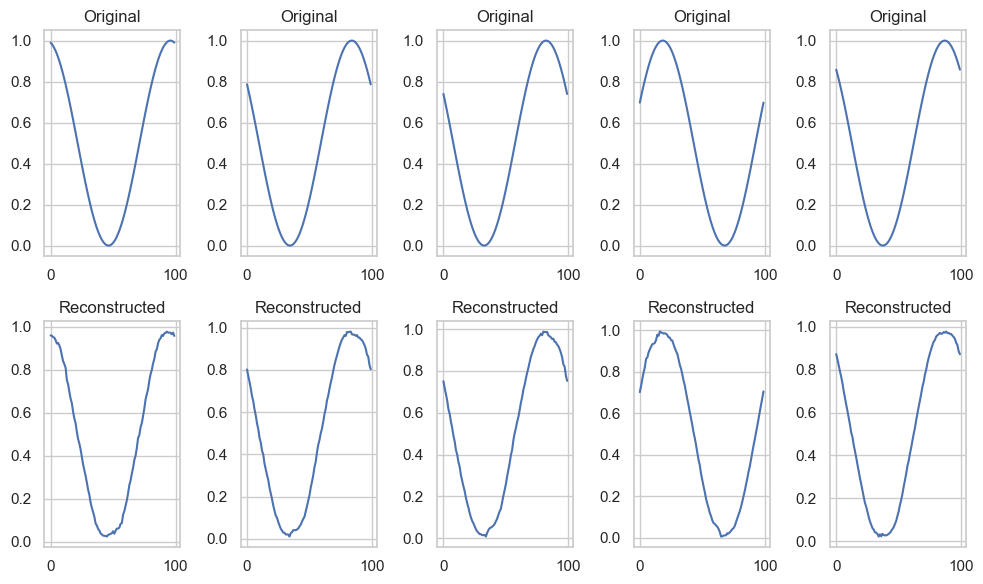

In [6]:
# Visualize original vs reconstructed signal
reconstructed = autoencoder.predict(x_test[:5])
plt.figure(figsize=(10, 6))
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.plot(x_test[i])
    plt.title("Original")
    plt.subplot(2, 5, i+6)
    plt.plot(reconstructed[i])
    plt.title("Reconstructed")
plt.tight_layout()
plt.show()

## 🔸 3. Autoencoder for Image Data (MNIST Digits)


In [7]:
# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), 784))
x_test = x_test.reshape((len(x_test), 784))

# Define image autoencoder
input_img = layers.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

autoencoder_img = models.Model(input_img, decoded)
autoencoder_img.compile(optimizer='adam', loss='mse')
autoencoder_img.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 222,384 (868.69 KB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Train the image autoencoder
autoencoder_img.fit(x_train, x_train, epochs=20, batch_size=256, shuffle=True, validation_data=(x_test, x_test), verbose=1, callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)])

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0104 - val_loss: 0.0101
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0102 - val_loss: 0.0099
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0100 - val_loss: 0.0100
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0099 - val_loss: 0.0096
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0097 - val_loss: 0.0095
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0097 - val_loss: 0.0095
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0095 - val_loss: 0.0094
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0094 - val_loss: 0.0093
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0094 - val_loss: 0.0092
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0093 - val_loss: 0.0091
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0092 - val_loss: 0.0090
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


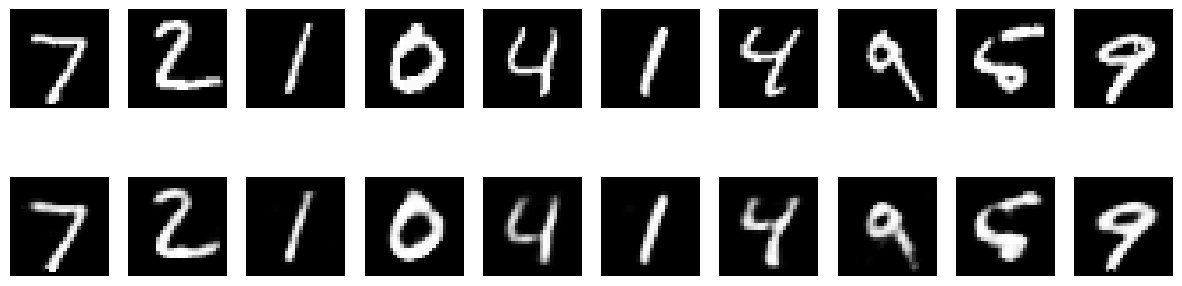

In [12]:
# Show original and reconstructed MNIST digits
decoded_imgs = autoencoder_img.predict(x_test[:10])
plt.figure(figsize=(15, 4))
for i in range(10):
    # Original
    ax = plt.subplot(2, 10, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis("off")
    # Reconstructed
    ax = plt.subplot(2, 10, i + 11)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.axis("off")
plt.show()